In [5]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

In [6]:
base_dir_path = "/home/megatron/Workspace/full-time/TristarAi/repos/skincancer_classification/data"

#### Rename

In [11]:
def rename_images(base_path='dataset'):
    folders = ['train/Benign', 'train/Malignant', 'test/Benign', 'test/Malignant']
    
    for folder in tqdm(folders):
        folder_path = os.path.join(base_path, folder)
        images = sorted(os.listdir(folder_path))
        
        for idx, img_name in tqdm(enumerate(images, start=1)):
            old_path = os.path.join(folder_path, img_name)
            new_name = f"{idx}.jpg"
            new_path = os.path.join(folder_path, new_name)
            
            os.rename(old_path, new_path)
            
    print("Renaming complete for all folders.")

In [12]:
rename_images(base_path=base_dir_path)

6289it [00:00, 65120.20it/s]?, ?it/s]
5590it [00:00, 76013.82it/s]00:00,  9.76it/s]
1000it [00:00, 66776.58it/s]
1000it [00:00, 74570.71it/s]
100%|██████████| 4/4 [00:00<00:00, 18.79it/s]

Renaming complete for all folders.


#### Dimensionality check

In [13]:
def check_image_dimensions(base_path='dataset'):
    folders = ['train/Benign', 'train/Malignant', 'test/Benign', 'test/Malignant']
    dimensions = defaultdict(list)
    
    for folder in tqdm(folders, desc="Checking dimensions in folders"):
        folder_path = os.path.join(base_path, folder)
        images = os.listdir(folder_path)
        
        for img_name in tqdm(images, desc=f"Checking images in {folder}", total=len(images)):
            img_path = os.path.join(folder_path, img_name)
            with Image.open(img_path) as img:
                dimensions[folder].append(img.size)
    
    # dimension statistics
    for folder, dims in dimensions.items():
        dims_array = np.array(dims)
        unique_dims = np.unique(dims_array, axis=0)
        print(f"{folder} - Unique Dimensions: {unique_dims}")
    
    print("Dimension check complete.")

In [14]:
check_image_dimensions(base_path=base_dir_path)

Checking dimensions in folders: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


train/Benign - Unique Dimensions: [[224 224]]
train/Malignant - Unique Dimensions: [[224 224]]
test/Benign - Unique Dimensions: [[224 224]]
test/Malignant - Unique Dimensions: [[224 224]]
Dimension check complete.


#### Pixel intensity and colour distribution check

In [9]:
def analyze_pixel_intensity(base_path='dataset'):
    folders = ['train/Benign', 'train/Malignant', 'test/Benign', 'test/Malignant']
    
    for folder in tqdm(folders, desc="Analyzing pixel intensity in folders"):
        folder_path = os.path.join(base_path, folder)
        images = os.listdir(folder_path)
        
        r_sum, g_sum, b_sum = 0, 0, 0
        r_count, g_count, b_count = 0, 0, 0
        r_hist, g_hist, b_hist = np.zeros(256), np.zeros(256), np.zeros(256)

        for img_name in tqdm(images, desc=f"Processing images in {folder}", total=len(images)):
            img_path = os.path.join(folder_path, img_name)
            with Image.open(img_path) as img:
                img = img.convert('RGB') 
                img_array = np.array(img)
                
                # flatten arrays
                r_channel = img_array[:, :, 0].flatten()
                g_channel = img_array[:, :, 1].flatten()
                b_channel = img_array[:, :, 2].flatten()
                
                # update histograms
                r_hist += np.histogram(r_channel, bins=256, range=(0, 256))[0]
                g_hist += np.histogram(g_channel, bins=256, range=(0, 256))[0]
                b_hist += np.histogram(b_channel, bins=256, range=(0, 256))[0]

                # update sums and counts for statistics
                r_sum += r_channel.sum()
                g_sum += g_channel.sum()
                b_sum += b_channel.sum()
                
                r_count += r_channel.size
                g_count += g_channel.size
                b_count += b_channel.size

        # plot histograms
        plt.figure(figsize=(15, 5))
        plt.suptitle(f'Pixel Intensity Distribution - {folder}')

        plt.subplot(1, 3, 1)
        plt.bar(range(256), r_hist, color='red', alpha=0.7)
        plt.title('Red Channel')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        plt.bar(range(256), g_hist, color='green', alpha=0.7)
        plt.title('Green Channel')
        plt.xlabel('Pixel Intensity')

        plt.subplot(1, 3, 3)
        plt.bar(range(256), b_hist, color='blue', alpha=0.7)
        plt.title('Blue Channel')
        plt.xlabel('Pixel Intensity')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # print stats
        for channel, total, count in zip(['Red', 'Green', 'Blue'], [r_sum, g_sum, b_sum], [r_count, g_count, b_count]):
            mean_val = total / count
            print(f"{folder} - {channel} Channel: Mean={mean_val:.2f}")

    print("Pixel intensity and color distribution analysis complete.")

Processing images in train/Benign: 100%|██████████| 5302/5302 [00:07<00:00, 671.04it/s]


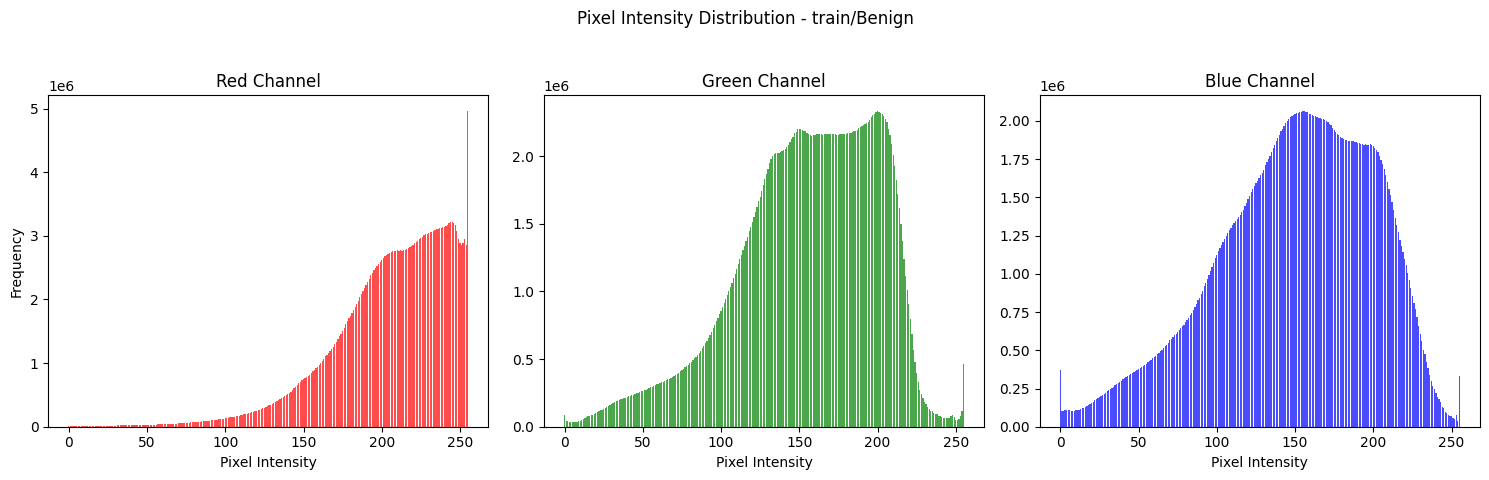

Analyzing pixel intensity in folders:  25%|██▌       | 1/4 [00:08<00:25,  8.54s/it]

train/Benign - Red Channel: Mean=205.49
train/Benign - Green Channel: Mean=155.05
train/Benign - Blue Channel: Mean=149.68


Processing images in train/Malignant: 100%|██████████| 4603/4603 [00:06<00:00, 660.38it/s]


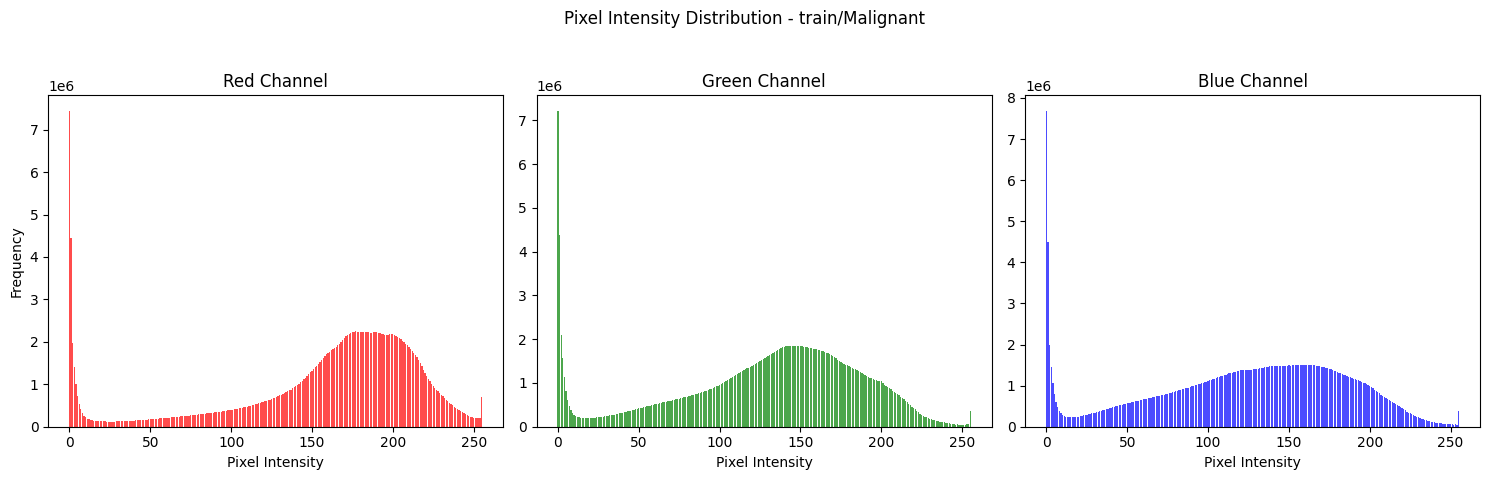

Analyzing pixel intensity in folders:  50%|█████     | 2/4 [00:16<00:15,  7.98s/it]

train/Malignant - Red Channel: Mean=155.94
train/Malignant - Green Channel: Mean=127.74
train/Malignant - Blue Channel: Mean=123.04


Processing images in test/Benign: 100%|██████████| 1000/1000 [00:01<00:00, 651.92it/s]


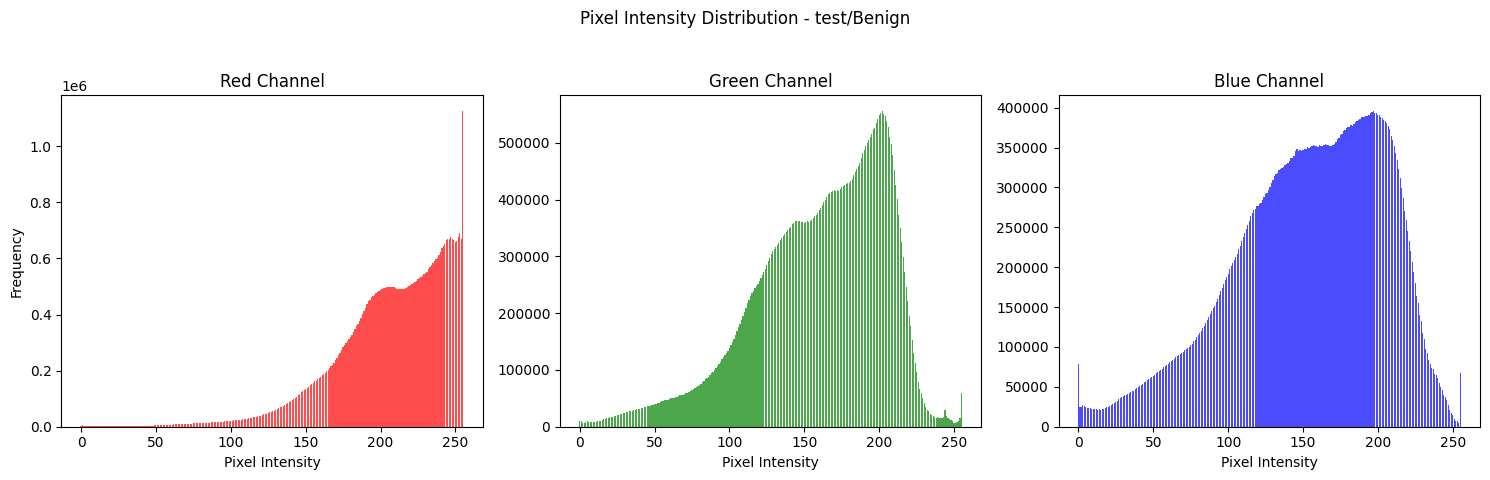

Analyzing pixel intensity in folders:  75%|███████▌  | 3/4 [00:18<00:05,  5.32s/it]

test/Benign - Red Channel: Mean=207.36
test/Benign - Green Channel: Mean=160.38
test/Benign - Blue Channel: Mean=153.69


Processing images in test/Malignant: 100%|██████████| 1000/1000 [00:01<00:00, 636.21it/s]


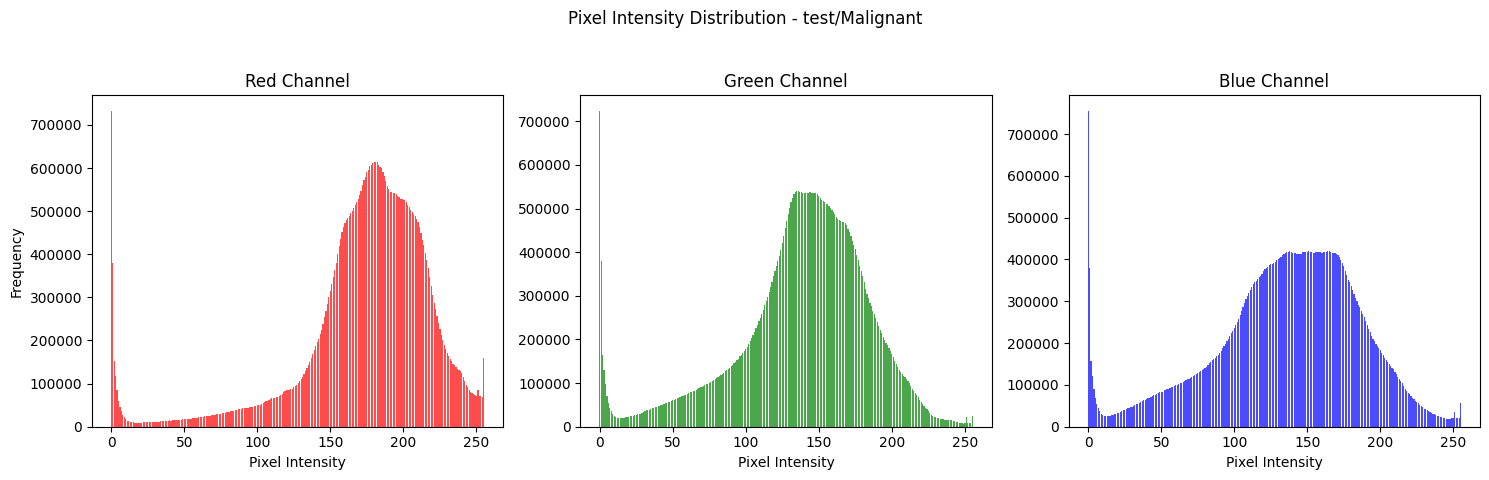

Analyzing pixel intensity in folders: 100%|██████████| 4/4 [00:20<00:00,  5.10s/it]

test/Malignant - Red Channel: Mean=172.57
test/Malignant - Green Channel: Mean=137.27
test/Malignant - Blue Channel: Mean=134.67
Pixel intensity and color distribution analysis complete.


In [10]:
analyze_pixel_intensity(base_path=base_dir_path)